# アインシュタイン比熱とデバイ比熱  

格子振動による比熱はアインシュタインの式とデバイの式があります。  

アインシュタイン比熱  

　　$C_V(T) = 3N_A k_B \bigl( \frac{\Theta_E}{T} \bigr)^2 \frac{e^{\Theta_E / T}}{(e^{\Theta_E / T} - 1)^2}$  

デバイ比熱  

　　$C_V(T) = 9N_A k_B \bigl( \frac{T}{\Theta_D} \bigr)^3 \int_{0}^{\Theta_D / T}\frac{x^4 e^x}{(e^x - 1)^2}dx$  

この計算をJuliaですると、以下のようになります。

  0.528883 seconds (1.82 M allocations: 88.989 MiB, 31.89% gc time)


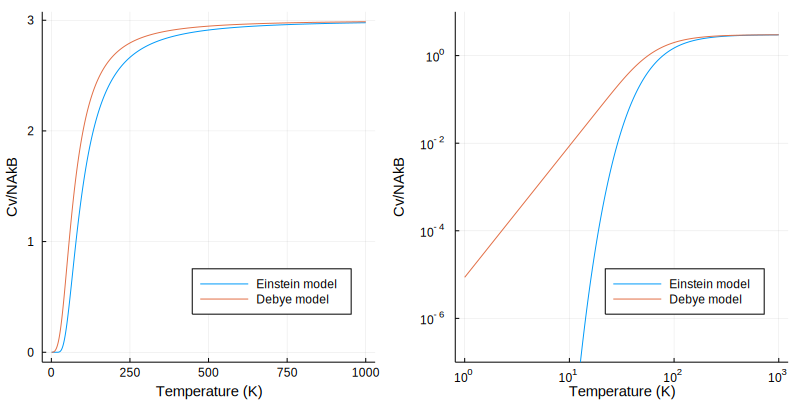

In [3]:
#//------------------------------------------------------------------------//
#//---    アインシュタイン比熱とデバイ比熱のシミュレーション 
#//------------------------------------------------------------------------//
import Plots
using QuadGK

#//---------- 図の描画のための関数 ----------//
function DataPlot(xwave, y1wave, y2wave, label1, label2)
    Plots.reset_defaults()
    Plots.gr(
        titlefont=Plots.font("sans-serif", 12),
        legendfont=Plots.font("sans-serif", 8),
        guidefont=Plots.font("sans-serif", 10),
        tickfont=Plots.font("sans-serif", 8),
    )
    p1 = Plots.plot(xwave, [y1wave, y2wave],
        xscale = :identity, yscale = :identity,
        seriestype=:line, label=[label1 label2], legend=:bottomright
    )
    p2 = Plots.plot(xwave, [y1wave, y2wave],
        xscale = :log10, yscale = :log10, ylims=(10^(-7),10),
        seriestype=:line, label=[label1 label2], legend=:bottomright
    )
    Plots.plot(p1,p2,layout=(1,2),size=(800,400))
    Plots.plot!(ylabel="Cv/NAkB", xlabel="Temperature (K)")
end

#//---------- 比熱の計算をする関数 ----------//
function SpecificHeatCalc()

    ET = 300; #アインシュタイン温度（K）
    DT = 300; #デバイ温度（K）
    kB = 1; #ボルツマン定数。１としておきます。
    N0 = 1; #アボガドロ数。１としておきます

    #温度の設定
    temp = collect(1:0.1:1000);
    #アインシュタイン比熱
    EinC = 3*N0*kB*((ET./temp).^2).*exp.(ET./temp)./(exp.(ET./temp).-1).^2;
    #デバイ比熱
    f(x) = x^4*exp(x)/(exp(x)-1)^2; #積分する式の定義
    intpart1 = quadgk.(f, 0, DT./temp); #積分部分の実行
    intpart2 = [intpart1[i][1] for i in 1:length(intpart1)] #TupleをArrayに変換とか
    DebC = 9*N0*kB*((temp./DT).^3).*intpart2;
    return temp, EinC, DebC
end

#//---------- 計算の実行 ----------//
@time temp, EinC, DebC = SpecificHeatCalc()

#//---------- 図の描画とデータ保存 ----------//
DataPlot(temp, EinC, DebC, "Einstein model", "Debye model")